In [1]:
# revise: ensures that any changes to the modules loaded below will be re-loaded automatically
using Revise


# Load package 
# Includet instead of include from Revise
#include("backward_induction.jl")

In [2]:
includet("backward_induction.jl")

In [3]:
using .vfi

<h1> Exercise 2: The Infinite Horizon Consumption Model

Consider again the simplest consumption-saving model but with an infinite time horizon:

$$\begin{aligned}
    V_1^*(W_1) &= \max_{c_1,c_2,\dots} \{ \sqrt{c_1} +\beta \sqrt{c_2}+\beta^2\sqrt{c_3}+\cdots \} \\
    & \text{s.t.} \\
    W_{t+1} & = W_{t}-c_{t} \\
    c_{t} & \leq  W_{t} , \,\forall t\\
    c_{t} & \in  \mathbb{R}_+, \,\forall t
\end{aligned}$$
for $\beta =0.9$ and $W_1=5$.



Notice, we can rewrite the first equation as a Bellman equation:

$$\begin{aligned}
    V^*(W_t) &=\sqrt{c_t} + V^*(\underbrace{W_{t}-c_t}_{W_{t+1}}), \forall t
\end{aligned}$$


### 1. Solve the model using value function iteration (VFI): 

In [4]:
par = (beta=0.9,W=5,tol=10e-3,max_iter =1000)


(beta = 0.9, W = 5, tol = 0.01, max_iter = 1000)

In [5]:
sol = vfi.solve(par)

Main.vfi.Sol([0, 1, 2, 3, 4, 5], [0, 1, 1, 1, 1, 1], [0.0, 1.0, 1.9, 2.71, 3.439, 4.0951], 0.0, 6)

In [6]:
# Print possible references
fieldnames(typeof(sol))

(:W_grid, :C, :V, :delta, :it)

In [7]:
print(sol.V)

[0.0, 1.0, 1.9, 2.71, 3.439, 4.0951]

### 2. Create a function with $\beta$ and $W$ as inputs. Solve the model for $\beta=0.9$ and $W=20$.

In [8]:
# Define a function
par = (beta=0.9,W=20,tol=10e-3,max_iter =1000)

sol= vfi.solve(par)

print(sol.C)

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3]

### 3. Plot the converged value function and make sure the value function is increasing in $W$.

In [16]:

using Plots
using LaTeXStrings # L before strings makes latex
pyplot()

Plots.PyPlotBackend()

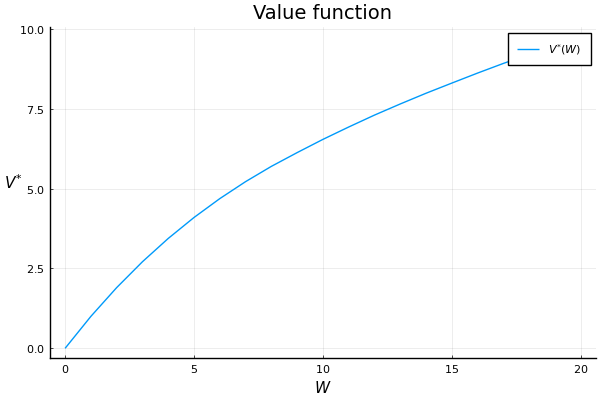

In [10]:
plot(sol.W_grid,sol.V,label=L"$V^{*}\left(W\right)$",
    xlabel=L"$W$", ylabel=L"$V^{*}$", yguidefontrotation=-90,title="Value function")

### 4. For $T=10$, $\beta=0.9$  and $W=20$ compare your solution using backward induction from exercise 1 with VFI. *How do the solutions differ?* 

In [11]:
par_b =( beta=0.9,W=20,T=10)

(beta = 0.9, W = 20, T = 10)

In [12]:
using .backwards

In [13]:
sol_b = backwards.solve(par_b)

Main.backwards.Sol([0, 1, 2, 3, 4, 5, 6, 7, 8, 9  …  11, 12, 13, 14, 15, 16, 17, 18, 19, 20], [0 0 … 0 0; 1 1 … 1 1; … ; 4 4 … 10 19; 4 4 … 11 20], [0.0 0.0 … 0.0 0.0; 1.0 1.0 … 1.0 1.0; … ; 9.338749685185753 9.195918162631443 … 5.862277660168379 4.358898943540674; 9.583338651631443 9.437072435819452 … 6.0166247903554 4.47213595499958])

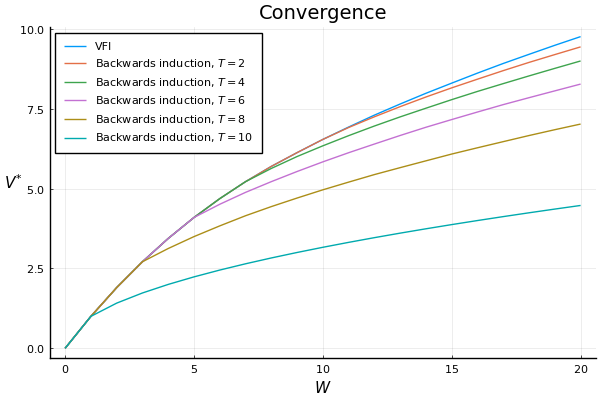

In [14]:
plot(sol.W_grid,sol.V,label="VFI",
    xlabel=L"$W$", ylabel=L"$V^{*}$", yguidefontrotation=-90,title="Convergence",legend=:topleft)

for t = 2:2:par_b.T
    plot!(sol_b.W_grid,sol_b.V[:,t],label = L"Backwards induction, $T=%$t $")
end
plot!()

### 5. Vary $\beta$ and check that the number of periods until convergence is increasing in $\beta$. *What is the reason for this lower convergence?*

In [19]:
beta_vec = [0.3,0.5,0.75, 0.80, 0.85, 0.90,0.93, 0.96]
it_vec = Array{Float64}(undef, length(beta_vec) )
i=1
for beta in beta_vec
    par = (beta=beta,W=20,tol=10e-3,max_iter =10000)
    sol = vfi.solve(par)
    it_vec[i]= sol.it
    i +=1 
        
end

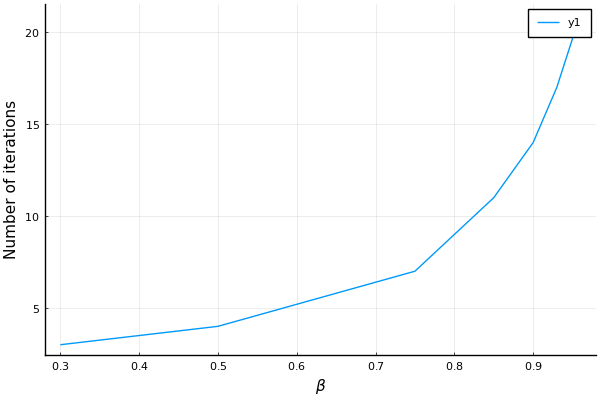

In [22]:
plot(beta_vec,it_vec,xlabel=L"\beta",ylabel="Number of iterations")


### 6. Simulate $C_1$, $C_2$,...,$C_{10}$ using the policy function found in 2) and W=5

In [25]:
sim = vfi.simulate(sol,10,5)

Main.vfi.Sim(5, 10, [1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [36]:
println("Solution for C with T = $(sim.T) and W = $(sim.W) \nC = $(sim.C)")

Solution for C with T = 10 and W = 5 
C = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
